# HCCR (Handwritten Chinese Character Recognition) by Zhang Fengyang
 
# History
It's plain to see that Chinese Character Recognition is a very challenging field in Pattern Recognition and Machine Learning, because of its huge amount of classes (compared to languages like English or French), and also because the writing style varies among one person to another, thanks to the complexity of Chinese characters.
Traditional methods to recognize Chinese characters mainly contain three parts: 

    1.preprocessing
    2.feature extracting
    3.classification
These methods are not doing good enough compared to methods equipped with Deep Learning.

# Methods with Deep Learning
## End-to-end CNN method:
1. Lenet5CNN on hand-written English letter and digits recognition, Yann Lecun et al.
This is, like, the very crucial network to make CNN a popular architecture, and it achieves 99.05% on MNIST, which is a hand-written digits database.
2. CNN with Data Augmentation, Simard et al.
By using elastic distortion and affine distortion, they achieved better result (99.6%) than the original Lenet architecture.
But these are all just digits, they can also be easily applied to English characters, which is not of a big amount. However when it comes to Chinese characters, these are not sufficient.
3. Chinese character recognition on 1000 classes, IDSIA.
In 2011, scholars in Switzerland firstly used GPUs to train CNN, and achieved recognition with a relatively large class number. They got 89.12% on NIST SD19, and 99.72% on MNIST. Based on this method they also got outstanding performance on ICDAR2011.
4. Multi-column Deep Neural Networks (MCDNN), IDSIA.
In 2012, scientists in IDSIA came up with a method to train multiple CNN on multiple GPUs, and perform simple integration on their decisions, achieving state-of-the-art performance on CASIA-OLHWDB1.1 online dataset. They also got 93.5% on offline dataset, which is better than ICDAR2011. In ICDAR2013 online and offline Chinese Character Recognition, both winning team (Fei Yin et al.) used CNN architecture.

There are some points to be cleared: 
First, the difference between online and offline dataset is, an online dataset includes the stroke trajectory, which can be utilized, while the offline dataset doesn't have this advantage. So naturally the methods towards these two are slightly different, and state-of-the-art accuracy on online datasets are slightly better than that on offline datasets, at least until recently.
Second, there are there hand-written datasets mentioned before: MNIST, NIST-SD19 and CASIA. MNIST is a database of handwritten digits which has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST; NIST-SD19 is a Special Dataset from NIST, which contains NIST's entire corpus of training materials for handprinted document and character recognition. CASIA-OLHWDB and CASIA-HWDB are the online and offline Chinese handwriting databases, built by the National Laboratory of Pattern Recognition (NLPR), Institute of Automation of Chinese Academy of Sciences (CASIA). 

## CNN method with additional information:
The end-to-end method didn't take full advantage of many field-specific information. These information ca be beneficial to recognition, and they cannot be learned by CNNs themselves.
1. CNN with Data Generating.
In many situations we have not enough training samples, thus Data Augmentation is a very important technology.
In 2015, Beyond human recognition:a CNN-based framework for handwritten character recognition, Chen L et al. proposed a deeper CNN architecture, at the same time incorporated Data Augmentation, used 5 CNN to vote, and they got a result of 96.79% on Offline Dataset, which is also the best result as far.
2. CNN with Shape Normalization.
Shape normalization can be viewed as a coordinate mapping in continuous 2D space between original and normalized characters. Two of the algorithms used for shape norm is Line Density Projection Interpolation (LDPI) for offline characters and pseudo 2D bi-moment normalization (P2DBMN) for online characters.
3. CNN with directional features.
For offline characters, because we don't have the stroke trace information, so we should make good use of the gradient feature of the image. For edge detection, we can use Sobel Operation or Gabor feature.
For online characters, In his paper Spatially-sparse convolutional neural networks, Graham not only proposed a spatially-sparse CNN model, but he also introduced a method called Signature of Path, which is an online time-sequenced feature extraction method. Yang et al. got the best result on NLPR so far using this method with CNN. Some directional feature can also be applied to offline datasets, see HCCR-GoogLeNet model.

## Other refined CNN methods:
There are also methods that are focused on doing changes on the network architecture and training process.
1. Fractional Max-pooling (FMP).
This method is proposed by Graham, and the main idea is to change the stride in Max-pooling to some random fraction between 1 and 2, rather than an integer like before. It's proved that this trick can prevent overly-quick information loss.
2. DropSample.
Yang et al. proposed this method, its main idea is to give a weight to every sample in a mini-batch, and change the probability of these samples to be picked into training according to these weights, which is based on the CNN's output confidence of each sample. Train multiple CNN like this, and integrate them. This method has the best performance on ICDAR2013 up till now.
3. Relaxation CNN(R-CNN)
The main feature of R-CNN is it does not do weight sharing in conv layers, in order to let the neurons learn different feature separately, but an obvious problem is this is going to use much more memory.
4. Alternately training CNN (ART-CNN)
This method proposed a strategy to dynamically adjust the learning rate. After every N round, it random pick a weight matrix, and set its learning rate to 0, thus greatly improve the training speed.

## RNN / LSTM method:
It is interesting and actually reasonable to think that RNN's ability to incorporate sequence information can be favorable to Chinese Character Recognition. In 2015, researchers first tried to use RNN on the top of CNN for character recognition. They use CNN to provide a feature sequence, and feed the sequence into an RNN. In fact, this is also kind of an end-to-end method.

# Conclusion
I think some big companies have already been doing researches on this topic, and they have really big machines with, say, a thousand chips of GPU on each of them. They can thus train an enormous end-to-end CNN which probably can classify ten thousands classes or more. But methods with a little field-specific knowledge is also good to try. Moreover, I think combine RNN on the top of CNN is really a good point which may see its popularity goes up. As a summary, I think to achieve better and better result in HCCR, one or several points in the following should be paid attention to:
## Adequate training dataset
Although we have many mature dataset as introduced before, it is not enough. As a workaround solution, we could rely on Data Augmentation more to generate training set.

## Field-specific knowledge
We can also refer to some field-specific knowledge, which means we can make some use of the features like directional features in Chinese handwritings. Namely Gabor feature and Gradient feature in offline HCCR, eight-directional feature in online HCCR.

## Great computation ability
Talking in a more data-driven way, the computation ability is always the greater, the better. We can just increase the size of the network, as long as the memory of the GPU can hold it, and as long as it doesn't cost much time.

<table>
    <tr>
        <th>Model</th>
        <th>CNNs</th>
        <th>Additional Info</th>
        <th>Offline / Online</th>
        <th>Error Rate</th>
        <th>Model Memory</th>
    </tr>
    <tr>
        <th>MCDNN</th>
        <th>11-layer * 8</th>
        <th>Rescaling and Contrast Maximization</th>
        <th>Offline</th>
        <th>4.21%</th>
        <th>349.0MB</th>
    </tr>
    <tr>
        <th>Beyond Human</th>
        <th>15-layer * 5</th>
        <th>Sample Generation (by distortion)</th>
        <th>Offline</th>
        <th>3.21%</th>
        <th>950.0MB</th>
    </tr>
    <tr>
        <th>New Benchmark</th>
        <th>11-layer * 1</th>
        <th>DirectMap (direction decompose & shape normalization)</th>
        <th>Offline & Online</th>
        <th>3.05%</th>
        <th>23.5MB</th>
    </tr>
    
    
</table>
# 1. MCDNN, IDSIA

This model is the 2011 ICDAR winner and should-be winner of the 2013 ICDAR if they submitted the right preprocessing code. The model is named Multi-column Deep Convolutional Neural Network. The best MCDNN has 8 CNNs, all of which are 11-layered, they did some normalization on the picture as preprocessing step but nothing more.

# 2. Beyond Human Recognition, Fujitsu R & D center

This model claims to be the first to surpass human performance on MNIST and CASIA datasets. It's architecture is as follows:
![model2](pic/CNNwithSampleGen.png)

Their model can be divided into three parts: Sample Generation, CNN and Voting.
First in the sample generation part, they applied distortion both locally and globally. They didn't use normalization because that's contrictory with distortion. The local distortion add a small displacement to the original image on x, y coordinates and gray scale value respectively, and then Gaussian smoothing is applied, as well as bilinear interpolation. The global distortion includes some global transformations such as scaling and rotation. The distorted images are then used to train the CNNs.

For CASIA, they used a 15-layer network, represented:
    
    In-96Conv5-96MaxP3-128Conv3-192Conv3-256Conv3-256MaxP3-352Conv3-480Conv3-512Conv3-256MaxP3-512Conv3-640Conv3-640MaxP3-4096Full1-Out

In the training, they mainly used dropout and multi-supervised training, which is crucial for their model to converge during training. This is somewhat important as it is used in several huge convnets. The idea is to add auxiliary classifiers connected to these intermediate layers, in order to increase the gradient signal that gets propagated back, and provide additional regularization.

Last thing they do is multi-model voting. They used 5 model with the same architecture to vote, and higher accuracy is achieved. However I think this process costs too much extra memory and time, though therotically they should be good to the result, because they are trained on slightly different data (random distorted) and they may have reached at different local optimum. As a result this strategy lowered the error rate by 0.2%.
# 3. New Benchmark, Xu-yao Zhang, Yoshua Bengio et al.

The major difference of this new model is they didn't use data augmentation and model ensemble, which means their model are far less light-weighted than the two models before. As the preprocessing step, they represent the characters by the normalization-cooperated direction-decomposed feature maps (directMap), which can be viewed as a d × n × n sparse tensor.
![model3](pic/directMap.png)

For direction decomposition, they used Sobel operator, then decompose the direction of gradient into its to adjacent standard chaincode directions by the parallelogram rule. Then the gradient elements are directly mapped to directional maps, that's why its called normalization-cooperated, they didn't generate normalized images, they use the normalization as a mapping from gradients of original images to directMaps.
Later they used a single 11-layer CNN.

They've also proposed an adaptation layer, but that's some kind of hyper-parameter, so we can come back later.

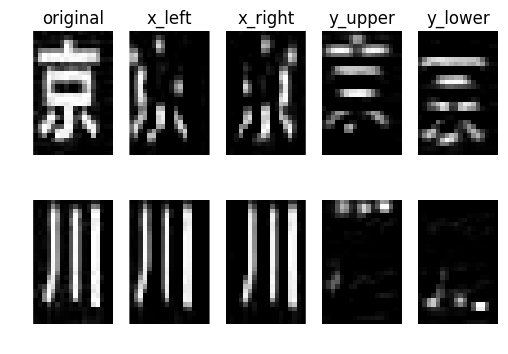

In [3]:
# compute gradient in four directions in a naive way
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['image.interpolation'] = 'none'

img_0 = imread('pic/test_img_0.jpg')
img_1 = imread('pic/test_img_1.jpg')

# show image helper
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.gca().axis('off')
    
# a naive conv forward    
def conv_forward_naive(x, w, b, conv_param):
    out = None
    H, W = x.shape
    HH, WW = w.shape
    pad = conv_param['pad']
    stride = conv_param['stride']

    x_padded = np.pad(x, ((pad, pad), (pad, pad)), 'constant')
    
    Out_h = (int)(1 + (H + 2 * pad - HH) / stride)
    Out_w = (int)(1 + (W + 2 * pad - WW) / stride)

    out = np.zeros((Out_h, Out_w))

    for k in range(Out_h):
        for l in range(Out_w):
            out[k, l] = np.sum(
                x_padded[k * stride : k * stride + HH, l * stride : l * stride + WW] * w) + b
    
    out[out < 0] = 0
    # normalize
    out_max, out_min = np.max(out), np.min(out)
    out = 255.0 * (out - out_min) / (out_max - out_min)
    return out

# sobel operator
w_y_upper = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
w_y_lower = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
w_x_left = w_y_upper.T
w_x_right = w_y_lower.T
b = 0

# perform sobel and show
img_gradient_y_upper_0 = conv_forward_naive(img_0, w_y_upper, b, {'stride': 1, 'pad': 1})
img_gradient_y_lower_0 = conv_forward_naive(img_0, w_y_lower, b, {'stride': 1, 'pad': 1})
img_gradient_x_left_0 = conv_forward_naive(img_0, w_x_left, b, {'stride': 1, 'pad': 1})
img_gradient_x_right_0 = conv_forward_naive(img_0, w_x_right, b, {'stride': 1, 'pad': 1})
img_gradient_y_upper_1 = conv_forward_naive(img_1, w_y_upper, b, {'stride': 1, 'pad': 1})
img_gradient_y_lower_1 = conv_forward_naive(img_1, w_y_lower, b, {'stride': 1, 'pad': 1})
img_gradient_x_left_1 = conv_forward_naive(img_1, w_x_left, b, {'stride': 1, 'pad': 1})
img_gradient_x_right_1 = conv_forward_naive(img_1, w_x_right, b, {'stride': 1, 'pad': 1})

plt.subplot(2, 5, 1)
plt.title('original')
imshow(img_0)
plt.subplot(2, 5, 2)
plt.title('x_left')
imshow(img_gradient_x_left_0)
plt.subplot(2, 5, 3)
plt.title('x_right')
imshow(img_gradient_x_right_0)
plt.subplot(2, 5, 4)
plt.title('y_upper')
imshow(img_gradient_y_upper_0)
plt.subplot(2, 5, 5)
plt.title('y_lower')
imshow(img_gradient_y_lower_0)
plt.subplot(2, 5, 6)
imshow(img_1)
plt.subplot(2, 5, 7)
imshow(img_gradient_x_left_1)
plt.subplot(2, 5, 8)
imshow(img_gradient_x_right_1)
plt.subplot(2, 5, 9)
imshow(img_gradient_y_upper_1)
plt.subplot(2, 5, 10)
imshow(img_gradient_y_lower_1)
# normalization
plt.show()

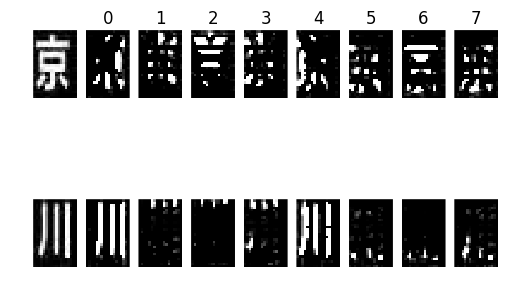

In [19]:
# compute gradient in eight chaincode directions
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
import math

pi = math.pi
plt.rcParams['image.interpolation'] = 'none'

img_0 = imread('pic/test_img_0.jpg')
img_1 = imread('pic/test_img_1.jpg')

# show image helper
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.gca().axis('off')
    
# a naive conv forward    
def conv_forward_naive(x, w, b, conv_param):
    out = None
    H, W = x.shape
    HH, WW = w.shape
    pad = conv_param['pad']
    stride = conv_param['stride']

    x_padded = np.pad(x, ((pad, pad), (pad, pad)), 'constant')
    
    Out_h = (int)(1 + (H + 2 * pad - HH) / stride)
    Out_w = (int)(1 + (W + 2 * pad - WW) / stride)

    out = np.zeros((Out_h, Out_w))

    for k in range(Out_h):
        for l in range(Out_w):
            out[k, l] = np.sum(
                x_padded[k * stride : k * stride + HH, l * stride : l * stride + WW] * w) + b
            
    return out

# sobel operation using conv            
def sobel(x, w_x, w_y):
    g_x = conv_forward_naive(x, w_x, b, {'stride': 1, 'pad': 1})
    g_y = conv_forward_naive(x, w_y, b, {'stride': 1, 'pad': 1})
    g_abs = np.abs(g_x) + np.abs(g_y) 
    # use arctan2 to compute [-pi, pi] angles
    g_arc = np.arctan2(g_y, g_x)
    return (g_abs, g_arc)

# map the gradients into directMap
def grad2directMap(g_abs, g_arc):
    directMap = np.zeros((8, g_abs.shape[0], g_abs.shape[1]))
    arcs = np.array([0, pi/4, pi/2, pi*3/4, pi])
    for i in range(4):
        lbound = arcs[i]
        ubound = arcs[i+1]
        mask = (g_arc < ubound) * (g_arc >= lbound) 
        directMap[i, :, :] += mask * g_abs * (np.cos(g_arc - lbound) - np.sin(g_arc - lbound))
        directMap[i+1, :, :] += mask * g_abs * (np.cos(ubound - g_arc) - np.sin(ubound - g_arc))
    arcs = np.array([-pi, -pi*3/4, -pi/2, -pi/4, 0])
    for i in range(4):
        lbound = arcs[i]
        ubound = arcs[i+1]
        mask = (g_arc < ubound) * (g_arc >= lbound) 
        directMap[i+4, :, :] += mask * g_abs * (np.cos(g_arc - lbound) - np.sin(g_arc - lbound))
        if(i == 3):
            directMap[0, :, :] += mask * g_abs * (np.cos(ubound - g_arc) - np.sin(ubound - g_arc))
        else:
            directMap[i+5, :, :] += mask * g_abs * (np.cos(ubound - g_arc) - np.sin(ubound - g_arc))
    directMap[directMap>255] = 255
    return directMap        
        
# sobel operator
w_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
w_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
b = 0

# perform sobel and get adsolute value and direction of the input image
img_g_abs_0, img_g_arc_0 = sobel(img_0, w_x, w_y)
img_g_abs_1, img_g_arc_1 = sobel(img_1, w_x, w_y)
directMap_0 = grad2directMap(img_g_abs_0, img_g_arc_0)
directMap_1 = grad2directMap(img_g_abs_1, img_g_arc_1)

# show the outcome
plt.subplot(2, 9, 1)
# plt.title('original')
imshow(img_0)
for i in range(2, 10):
    plt.subplot(2, 9, i)
    plt.title(i-2)
    imshow(directMap_0[i-2, :, :])

plt.subplot(2, 9, 10)
imshow(img_1)
for i in range(11, 19):
    plt.subplot(2, 9, i)
    imshow(directMap_1[i-11, :, :])
    
# plt.tight_layout()
plt.show()

In [ ]:
# thinning